Import necessary libraries for the project

In [1]:
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import gdown

Download the required data files

In [2]:
gdown.download('https://www.nyc.gov/assets/doh/downloads/zip/CHS_2009_DOHMH_2010B.zip','CHS_2009_DOHMH_2010B.zip',quiet=True)
gdown.download('https://data.cityofnewyork.us/download/w8eg-8ha6/application/x-zip-compressed','file.zip',quiet=True)

'file.zip'

Unzip the downloaded data files

In [3]:
!unzip CHS_2009_DOHMH_2010B.zip &> /dev/null
!unzip file.zip &> /dev/null

Read and display information about the neighborhood data

In [22]:
nbhds = gpd.read_file("CHS_2009_DOHMH_2010B.shp")
#print(nbhds.shape)
nbhds.head(2)

,UHF34_CODE,FIRST_BORO,FIRST_UHF_,UHF_CODE,UHF_Code_1,asthev2,asthev2_r,asthev2_s,bmicat3,bmicat3_r,...,sugarb3_s,waters5,waters5_r,waters5_s,wkwork2,wkwork2_r,wkwork2_s,SHAPE_Leng,SHAPE_Area,geometry
0,101.0,Bronx,Kingsbridge - Riverdale,101.0,101.0,13.4,0.0,0.0,18.7,0.0,...,0.0,20.2,0.0,0.0,65.5,0.0,0.0,57699.155285,1.332914e+08,"POLYGON ((1017992.893 269222.964, 1017812.000 ..."
1,102.0,Bronx,Northeast Bronx,102.0,102.0,14.7,0.0,0.0,25.6,0.0,...,0.0,25.0,0.0,0.0,61.9,0.0,0.0,88219.317097,1.813708e+08,"POLYGON ((1025012.990 270794.260, 1025061.481 ..."


Print unique neighborhood values

In [5]:
print(nbhds["FIRST_UHF_"].unique().tolist())

['Kingsbridge - Riverdale', 'Northeast Bronx', 'Fordham - Bronx Park', 'Pelham - Throgs Neck', 'Greenpoint', 'Downtown  - Heights - Slope', 'Bedford Stuyvesant - Crown Heights', 'East New York', 'Sunset Park', 'Borough Park', 'East Flatbush - Flatbush', 'Canarsie - Flatlands', 'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay', 'Williamsburg - Bushwick', 'Washington Heights - Inwood', 'Central Harlem - Morningside Heights', 'East Harlem', 'Upper West Side', 'Long Island City - Astoria', 'West Queens', 'Flushing - Clearview', 'Ridgewood - Forest Hills', 'Southwest Queens', 'Jamaica', 'Southeast Queens', 'Rockaway', 'Upper East Side - Gramercy', 'Chelsea - Village', 'Union Square, Lower Manhattan', 'Bayside - Meadows', 'Northern SI', 'Southern SI', 'South Bronx', None]


Create and display a plot of the neighborhood data

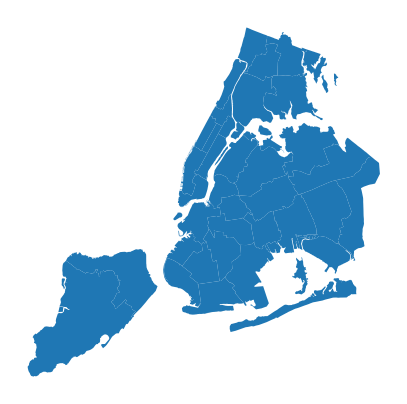

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('off')
nbhds.plot(ax=ax) # Plot the GeoDataFrame
plt.show()

Read the flood zone data

In [ ]:
floodzones = gpd.read_file("NYC Stormwater Flood Map - Extreme Flood with 2080 Sea Level Rise.gdb")

Display the first few rows of the flood zone data

In [8]:
floodzones.head()

,Flooding_Category,Shape_Length,Shape_Area,geometry
0,1,3.264384e+07,3.972152e+08,"MULTIPOLYGON Z (((917206.497 120931.611 0.000,..."
1,2,1.656489e+07,3.054550e+08,"MULTIPOLYGON Z (((917270.790 120873.747 0.000,..."
2,3,8.042525e+06,3.455846e+08,"MULTIPOLYGON Z (((915290.556 120269.389 0.000,..."


Define a target neighborhood and extract its shape

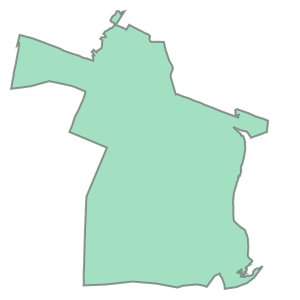

In [15]:
tar='Northeast Bronx'
nbhdstar=nbhds[nbhds['FIRST_UHF_']==tar]
tarshape=nbhds.iloc[nbhds['FIRST_UHF_'].to_list().index(tar),nbhds.columns.to_list().index('geometry')]
display(tarshape)

Create subsections within the target neighborhood

In [10]:
rows, cols = 5, 5
min_x, min_y, max_x, max_y = nbhdstar.total_bounds
width = (max_x - min_x) / cols
height = (max_y - min_y) / rows
row=4
col=4
left = min_x + col * width
right = left + width
top = max_y - row * height
bottom = top - height
subsection = shapely.geometry.box(left, bottom, right, top)
subsection_gdf = gpd.GeoDataFrame({'geometry': [subsection]}, crs=nbhdstar.crs)

Create a plot of the original neighborhood and the last subsection

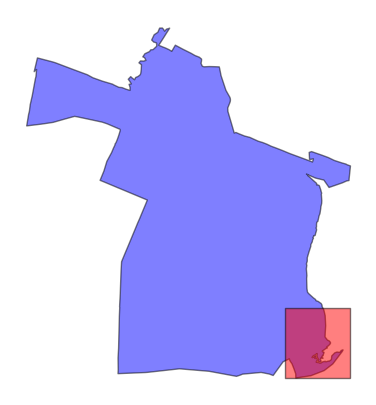

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
nbhdstar.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k') # Plot the original GeoDataFrame
subsection_gdf.plot(ax=ax, color='red', alpha=0.5, edgecolor='k') # Plot the subsection
ax.set_axis_off()
plt.show()

Create subsections for the entire neighborhood and display them

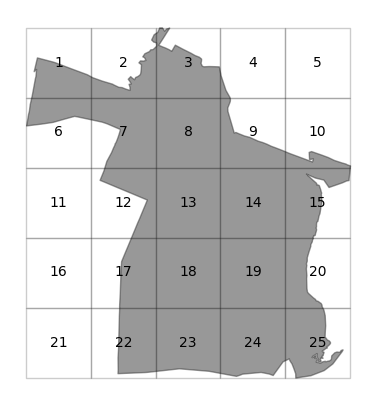

In [16]:
# Create an empty GeoDataFrame to store all subsections
all_subsections_gdf = gpd.GeoDataFrame(columns=['geometry'], crs=nbhdstar.crs)

# Iterate through rows and columns to create and add subsections to the all_subsections_gdf
counter = 0
for row in range(rows):
    for col in range(cols):
        counter += 1
        left = min_x + col * width
        right = left + width
        top = max_y - row * height
        bottom = top - height
        subsection = shapely.geometry.box(left, bottom, right, top)
        subsection_gdf = gpd.GeoDataFrame({'geometry': [subsection]}, crs=nbhdstar.crs)  # Set CRS for each subsection
        all_subsections_gdf = pd.concat([all_subsections_gdf, subsection_gdf], ignore_index=True)

# Plot the original GeoDataFrame and all subsections
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the original GeoDataFrame
nbhdstar.plot(ax=ax, color='black', alpha=0.5, edgecolor='k')

# Plot all subsections
all_subsections_gdf.plot(ax=ax, color='white', alpha=0.2, edgecolor='k')

# Annotate each subsection with a counter
for idx, geom in enumerate(all_subsections_gdf['geometry']):
    x, y = geom.centroid.coords[0]  # Get the centroid of the subsection
    ax.annotate(str(idx + 1), xy=(x, y), ha='center', va='center', fontsize=10)
ax.set_axis_off()
plt.show()


 Calculate and display the area where the neighborhood and last subsection overlap

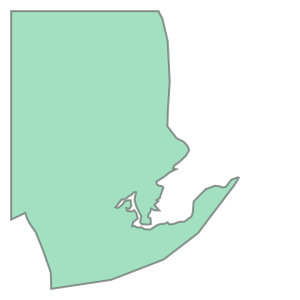

In [17]:
nbhdstarsub=nbhdstar.intersection(subsection)
display(nbhdstarsub.values[0])

Calculate and store flood zone statistics for subsections

In [18]:
rows, cols = 5, 5
storage=[]
for nbhd in nbhds["FIRST_UHF_"].unique():

  if nbhd==None:
    continue

  nbhdstar=nbhds[nbhds['FIRST_UHF_']==nbhd]
  min_x, min_y, max_x, max_y = nbhdstar.total_bounds
  width = (max_x - min_x) / cols
  height = (max_y - min_y) / rows
  counter = 0
  for row in range(rows):
    for col in range(cols):
      counter=counter+1
      left = min_x + col * width
      right = left + width
      top = max_y - row * height
      bottom = top - height
      subsection = shapely.geometry.box(left, bottom, right, top)
      subsection_gdf = gpd.GeoDataFrame({'geometry': [subsection]}, crs=nbhdstar.crs)
      nbhdstarsub=nbhdstar.intersection(subsection)
      ar=nbhdstarsub.to_crs(nbhdstar.crs).area.values[0]
      flood1=nbhdstarsub.intersection(floodzones.iloc[0,3]).area.values[0]
      flood2=nbhdstarsub.intersection(floodzones.iloc[1,3]).area.values[0]
      flood3=nbhdstarsub.intersection(floodzones.iloc[2,3]).area.values[0]

      if ar>0:
        storage.append((nbhd,counter,flood1/ar,flood2/ar,flood3/ar))

Display the first 5 records in the storage data

In [19]:
storage[0:5]

[('Kingsbridge - Riverdale',
  2,
  0.007099106666525785,
  0.0036836467950715256,
  0.0072576424625942415),
 ('Kingsbridge - Riverdale', 3, 0.03359991823061734, 0.02676885530906435, 0.0),
 ('Kingsbridge - Riverdale',
  4,
  0.00826869025590325,
  0.0005340724765132109,
  0.0),
 ('Kingsbridge - Riverdale', 5, 0.0, 0.0, 0.0),
 ('Kingsbridge - Riverdale', 6, 0.0, 0.0, 0.09263677324735722)]

Create a DataFrame from the collected data

In [20]:
df=pd.DataFrame(storage,columns=['Neighborhood','Section','Nuisance','Deep','High Tide'])
df['Section']=df['Section'].astype(str)
df.head()

,Neighborhood,Section,Nuisance,Deep,High Tide
0,Kingsbridge - Riverdale,2,0.007099,0.003684,0.007258
1,Kingsbridge - Riverdale,3,0.033600,0.026769,0.000000
2,Kingsbridge - Riverdale,4,0.008269,0.000534,0.000000
3,Kingsbridge - Riverdale,5,0.000000,0.000000,0.000000
4,Kingsbridge - Riverdale,6,0.000000,0.000000,0.092637


Create and display a line chart for a selected neighborhood

In [21]:
# Create a line chart
sel='Northeast Bronx'
fig = px.line(df[df.Neighborhood==sel], x='Section', y=['Nuisance', 'Deep', 'High Tide'])
fig.update_layout(title=sel + ' Stormwater Flood Map - Extreme Flood with 2080 Sea Level Rise')
fig.update_layout(yaxis_title='Fraction')
fig.update_layout(legend_title_text='Flooding Category')

# Show the plot
fig.show()
